In [1]:

from pathlib import Path
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %matplotlib inline
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
import pandas as pd 
#import geopandas as gpd
#import pygeos
import seaborn as sns
import xarray as xr
#import rioxarray as rio
from matplotlib.colors import LinearSegmentedColormap
import datetime
from datetime import timedelta
from scipy.spatial.distance import cdist
from math import dist
from scipy.stats import ttest_ind
#from geopy import distance
from scipy import stats
from matplotlib.gridspec import GridSpec
#from pylr2 import regress2
from matplotlib.dates import (AutoDateLocator, YearLocator, MonthLocator,
                              DayLocator, WeekdayLocator, HourLocator,
                              MinuteLocator, SecondLocator, MicrosecondLocator,
                              RRuleLocator, rrulewrapper, MONTHLY,
                              MO, TU, WE, TH, FR, SA, SU, DateFormatter,
                              AutoDateFormatter, ConciseDateFormatter)
from matplotlib.ticker import MaxNLocator,FixedLocator
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde

In [2]:
validata = pd.read_pickle('Pandora/ValidataMD2')

In [3]:
pandora3 = validata.copy()
pandora3['Location']=pandora3['loca']


In [4]:
seasonDict = {3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',
             12:'Winter',1:'Winter',2:'Winter'}
# seasonDict = {'03':'Spring','04':'Spring','05':'Spring','06':'Summer','07':'Summer','08':'Summer','09':'Autumn','10':'Autumn','11':'Autumn',
#              '12':'Winter','01':'Winter','02':'Winter'}
pandora3['Season'] = pandora3['Month'].map(seasonDict)
pandora3

,VCD(moles/m2),Lat,Lon,Hour,time,loca,datetime,GEMS,AMFCloudFraction,SolarZenithAngle,...,u,v,Wind_velocity,vcd0,ratio,VCD,DVCD,Month,Location,Season
56229,0.000219,37.4580,126.9510,1,2023053001,Seoul-SNU,2023-05-30 01:45:00,3.809300,0.297231,26.126650,...,-4.368670,-0.473523,4.394258,6.242646,1.638791,13.213171,-2.433346,5,Seoul-SNU,Spring
46448,0.000088,37.4580,126.9510,2,2023020802,Seoul-SNU,2023-02-08 02:45:00,3.825949,0.205094,54.045593,...,3.227090,-3.708272,4.915830,3.645829,0.952922,5.270003,0.180120,2,Seoul-SNU,Winter
6177,0.000357,37.4580,126.9510,6,2021090906,Seoul-SNU,2021-09-09 06:45:00,7.731202,0.090146,55.997890,...,1.090323,1.383768,1.761709,8.357835,1.081052,21.510885,-0.626633,9,Seoul-SNU,Autumn
662,0.000085,37.4580,126.9510,1,2021030501,Seoul-SNU,2021-03-05 01:45:00,-1.100536,0.146820,50.591850,...,1.798763,-3.302179,3.760311,4.158397,-3.778521,5.120085,-5.258932,3,Seoul-SNU,Spring
39472,0.000054,37.4580,126.9510,1,2022102601,Seoul-SNU,2022-10-26 01:45:00,9.187380,0.203542,53.573238,...,-0.623659,2.278356,2.362172,6.078684,0.661634,3.259227,3.108696,10,Seoul-SNU,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23022,0.000120,36.0506,140.1202,1,2022051801,Tsukuba-NIES-West,2022-05-18 01:45:00,7.801951,0.059065,19.863686,...,-0.521046,0.998883,1.126613,6.619256,0.848410,7.234831,1.182695,5,Tsukuba-NIES-West,Spring
14553,0.000041,36.0506,140.1202,2,2022021802,Tsukuba-NIES-West,2022-02-18 02:45:00,6.889956,0.164267,47.767956,...,3.840096,-6.670386,7.697639,3.479825,0.505058,2.486996,3.410131,2,Tsukuba-NIES-West,Winter
24607,0.000085,36.0506,140.1202,22,2022053122,Tsukuba-NIES-West,2022-05-31 22:45:00,4.097235,0.042868,49.611576,...,2.472115,-1.921503,3.131059,5.562957,1.357735,5.124963,-1.465723,5,Tsukuba-NIES-West,Spring
15374,0.000117,36.0506,140.1202,2,2022022702,Tsukuba-NIES-West,2022-02-27 02:45:00,6.977103,0.156220,44.469715,...,9.363667,3.545740,10.019752,3.179444,0.455697,7.057483,3.797659,2,Tsukuba-NIES-West,Winter


In [5]:
def tiz(a):
    if a in['Seosan', 'Seoul-SNU', 'Seoul', 'Busan', 'Incheon-ESC', 'Yokosuka', 'Tsukuba', 'Tsukuba-NIES', 'Fukuoka','Tokyo-TMU', 'Nagoya', 'Tsukuba-NIES-West', 'Kobe']:
       
        return 9
    elif a in ['Bangkok','Agam']:
        return 7
    elif a in ['Dhaka']:
        return 7
    else:
        return 8
pandora3['tz']=pandora3['loca'].map(tiz)
pandora3['Localtime'] = [pandora3.loc[ind,'datetime']+pd.Timedelta(hours=pandora3.loc[ind,'tz'],minutes=15) for ind in pandora3.index]

pandora3

,VCD(moles/m2),Lat,Lon,Hour,time,loca,datetime,GEMS,AMFCloudFraction,SolarZenithAngle,...,Wind_velocity,vcd0,ratio,VCD,DVCD,Month,Location,Season,tz,Localtime
56229,0.000219,37.4580,126.9510,1,2023053001,Seoul-SNU,2023-05-30 01:45:00,3.809300,0.297231,26.126650,...,4.394258,6.242646,1.638791,13.213171,-2.433346,5,Seoul-SNU,Spring,9,2023-05-30 11:00:00
46448,0.000088,37.4580,126.9510,2,2023020802,Seoul-SNU,2023-02-08 02:45:00,3.825949,0.205094,54.045593,...,4.915830,3.645829,0.952922,5.270003,0.180120,2,Seoul-SNU,Winter,9,2023-02-08 12:00:00
6177,0.000357,37.4580,126.9510,6,2021090906,Seoul-SNU,2021-09-09 06:45:00,7.731202,0.090146,55.997890,...,1.761709,8.357835,1.081052,21.510885,-0.626633,9,Seoul-SNU,Autumn,9,2021-09-09 16:00:00
662,0.000085,37.4580,126.9510,1,2021030501,Seoul-SNU,2021-03-05 01:45:00,-1.100536,0.146820,50.591850,...,3.760311,4.158397,-3.778521,5.120085,-5.258932,3,Seoul-SNU,Spring,9,2021-03-05 11:00:00
39472,0.000054,37.4580,126.9510,1,2022102601,Seoul-SNU,2022-10-26 01:45:00,9.187380,0.203542,53.573238,...,2.362172,6.078684,0.661634,3.259227,3.108696,10,Seoul-SNU,Autumn,9,2022-10-26 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23022,0.000120,36.0506,140.1202,1,2022051801,Tsukuba-NIES-West,2022-05-18 01:45:00,7.801951,0.059065,19.863686,...,1.126613,6.619256,0.848410,7.234831,1.182695,5,Tsukuba-NIES-West,Spring,9,2022-05-18 11:00:00
14553,0.000041,36.0506,140.1202,2,2022021802,Tsukuba-NIES-West,2022-02-18 02:45:00,6.889956,0.164267,47.767956,...,7.697639,3.479825,0.505058,2.486996,3.410131,2,Tsukuba-NIES-West,Winter,9,2022-02-18 12:00:00
24607,0.000085,36.0506,140.1202,22,2022053122,Tsukuba-NIES-West,2022-05-31 22:45:00,4.097235,0.042868,49.611576,...,3.131059,5.562957,1.357735,5.124963,-1.465723,5,Tsukuba-NIES-West,Spring,9,2022-06-01 08:00:00
15374,0.000117,36.0506,140.1202,2,2022022702,Tsukuba-NIES-West,2022-02-27 02:45:00,6.977103,0.156220,44.469715,...,10.019752,3.179444,0.455697,7.057483,3.797659,2,Tsukuba-NIES-West,Winter,9,2022-02-27 12:00:00


In [6]:
pandora3['Month']=pandora3['datetime'].dt.month
pandora3['Year']=pandora3['datetime'].dt.year


In [7]:
# pandora3.to_pickle('GEMS_MD2')

In [7]:
GEMS_MD = pd.read_pickle('GEMS_MD2')
GEMS_MD['Type'] = 'multi-axis'
GEMS_DS = pd.read_pickle('GEMS_DS2')
GEMS_DS['Type'] = 'direct-sun'

GEMS_DS

,ID,VCD(moles/m2),Lat,Lon,Altitude,Year,Month,Day,Hour,Minute,...,Wind_velocity,vcd0,ratio,VCD,DVCD,Location,Season,tz,Localtime,Type
26591,2023053002 Agam,0.000088,-0.2046,100.3195,865.0,2023,5,30,1,9.0,...,0.344420,5.055692,-0.719352,5.304298,-12.083811,Agam,Spring,7,2023-05-30 09:00:00,direct-sun
21980,2023020803 Agam,0.000142,-0.2046,100.3195,865.0,2023,2,8,2,50.5,...,0.166363,5.660730,-3.092624,8.535583,-7.491128,Agam,Winter,7,2023-02-08 10:00:00,direct-sun
30861,2023092505 Agam,0.000165,-0.2046,100.3195,865.0,2023,9,25,4,29.0,...,2.989497,4.088177,0.870078,9.953162,0.610457,Agam,Autumn,7,2023-09-25 12:00:00,direct-sun
30687,2023091804 Agam,0.000238,-0.2046,100.3195,865.0,2023,9,18,3,47.0,...,0.718474,4.263793,-0.512616,14.337780,-12.581498,Agam,Autumn,7,2023-09-18 11:00:00,direct-sun
24745,2023041408 Agam,0.000159,-0.2046,100.3195,865.0,2023,4,14,7,27.0,...,1.558179,6.083335,1.217076,9.594250,-1.085017,Agam,Spring,7,2023-04-14 15:00:00,direct-sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13017,2022052702 Kobe,0.000168,34.7190,135.2900,23.0,2022,5,27,1,54.0,...,3.968108,5.466670,0.804461,10.121778,1.328775,Kobe,Spring,9,2022-05-27 11:00:00,direct-sun
12505,2022051802 Kobe,0.000144,34.7190,135.2900,23.0,2022,5,18,1,52.0,...,0.867754,6.243176,1.615447,8.700586,-2.378501,Kobe,Spring,9,2022-05-18 11:00:00,direct-sun
10308,2022040101 Kobe,0.000072,34.7190,135.2900,23.0,2022,4,1,0,29.5,...,12.170037,5.035966,1.547561,4.309554,-1.781835,Kobe,Spring,9,2022-04-01 10:00:00,direct-sun
8916,2022022703 Kobe,0.000121,34.7190,135.2900,23.0,2022,2,27,2,3.0,...,8.523194,3.648318,-1.996004,7.262532,-5.476129,Kobe,Winter,9,2022-02-27 12:00:00,direct-sun


In [8]:
validata33 = pd.concat([GEMS_MD,GEMS_DS]).sort_values('loca').reset_index()
datetimeLis = []
for ind in validata33.index:
#     yearLis.append(j[:4])
#     monthLis.append(j[4:6])
#     dayLis.append(j[6:8])
#     hourLis.append(j[9:11])
#     minuteLis.append(j[11:13])
    datetime_obj = datetime.datetime(int(validata33.loc[ind,'Year']), int(validata33.loc[ind,'Month']), 1,1, 1)
    datetimeLis.append(datetime_obj)
validata33['datetime']=datetimeLis

In [9]:
# monthlyMD = GEMS_MD.sort_values(['Lat']).copy()
GEMS_MD['ID']=GEMS_MD['Month']+GEMS_MD['Year']*100

monthlyMD = GEMS_MD.groupby(['loca','ID']).mean().reset_index()

monthlyMDR = pd.DataFrame(columns = ['Location','R','p', 'N','bias'])

for i in list(monthlyMD['loca'].unique()):
    temp = monthlyMD[monthlyMD['loca']==i]
    try:
        N = len(temp['loca'])
        r = stats.pearsonr(temp['VCD'],temp['GEMS'])[0]
        p = stats.pearsonr(temp['VCD'],temp['GEMS'])[1]
        bis = (temp['GEMS'].mean()-temp['VCD'].mean())/temp['VCD'].mean()
        monthlyMDR.loc[len(monthlyMDR.index)] = [i, r, p, N,bis]
    except:
        monthlyMDR.loc[len(monthlyMDR.index)] = [i, 'N/A', 'N/A', N,'N/A']
monthlyMDR = monthlyMDR.set_index('Location')

monthlyMDR

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22276/2230365202.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthlyMD = GEMS_MD.groupby(['loca','ID']).mean().reset_index()


,R,p,N,bias
Location,,,,
Bangkok,0.600769,2.772348e-04,32,-0.178126
Beijing-RADI,0.849373,5.738992e-07,22,-0.152870
Busan,0.864145,9.048564e-07,20,0.189848
Dalanzadgad,0.833393,3.252923e-05,17,0.294780
Fukuoka,0.862393,1.008693e-06,20,-0.004307
Incheon-ESC,0.887173,2.059049e-06,17,-0.078360
Kobe,0.631805,1.221381e-03,23,1.643472
Nagoya,0.899009,2.391841e-09,24,-0.059155
Seosan,0.856247,2.100799e-10,33,-0.083100


In [10]:
GEMS_DS['ID']=GEMS_DS['Month']+GEMS_DS['Year']*100

monthlyDS = GEMS_DS.groupby(['loca','ID']).mean().reset_index()

monthlyDSR = pd.DataFrame(columns = ['Location','R','p', 'N','bias'])

for i in list(monthlyDS['loca'].unique()):
    temp = monthlyDS[monthlyDS['loca']==i]
    try:
        r = stats.pearsonr(temp['VCD'],temp['GEMS'])[0]
        p = stats.pearsonr(temp['VCD'],temp['GEMS'])[1]
        N = len(temp['loca'])
        bis = (temp['GEMS'].mean()-temp['VCD'].mean())/temp['VCD'].mean()
        monthlyDSR.loc[len(monthlyDSR.index)] = [i, r, p, N,bis]
    except:
        monthlyDSR.loc[len(monthlyDSR.index)] = [i, 'N/A', 'N/A', N,'N/A']
monthlyDSR = monthlyDSR.set_index('Location')
monthlyDSR

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22276/1540557637.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthlyDS = GEMS_DS.groupby(['loca','ID']).mean().reset_index()


,R,p,N,bias
Location,,,,
Agam,-0.666216,1.800596e-02,12,-0.626017
Bangkok,0.483365,2.718156e-01,7,-0.458038
Beijing-RADI,0.858952,1.243360e-06,20,-0.400998
Busan,0.603511,5.283623e-04,29,-0.388828
Dalanzadgad,0.669025,6.382955e-03,15,-0.235676
Dhaka,-0.158870,6.041716e-01,13,-0.566305
Fukuoka,0.886800,9.451285e-07,18,-0.379040
Incheon-ESC,0.801861,4.215629e-06,23,-0.538129
Kobe,0.897428,6.119758e-03,7,-0.246045


/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22276/382010434.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023.1','2023.7'], rotation=90, ha='right')
/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22276/382010434.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023.1','2023.7'], rotation=90, ha='right')
/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22276/382010434.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023.1','2023.7'], rotation=90, ha='right')
/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_22276/382010434.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023

Text(0.02, 0.5, 'HCHO VCD (10$^{15}$ molecules cm$^{-2}$)')

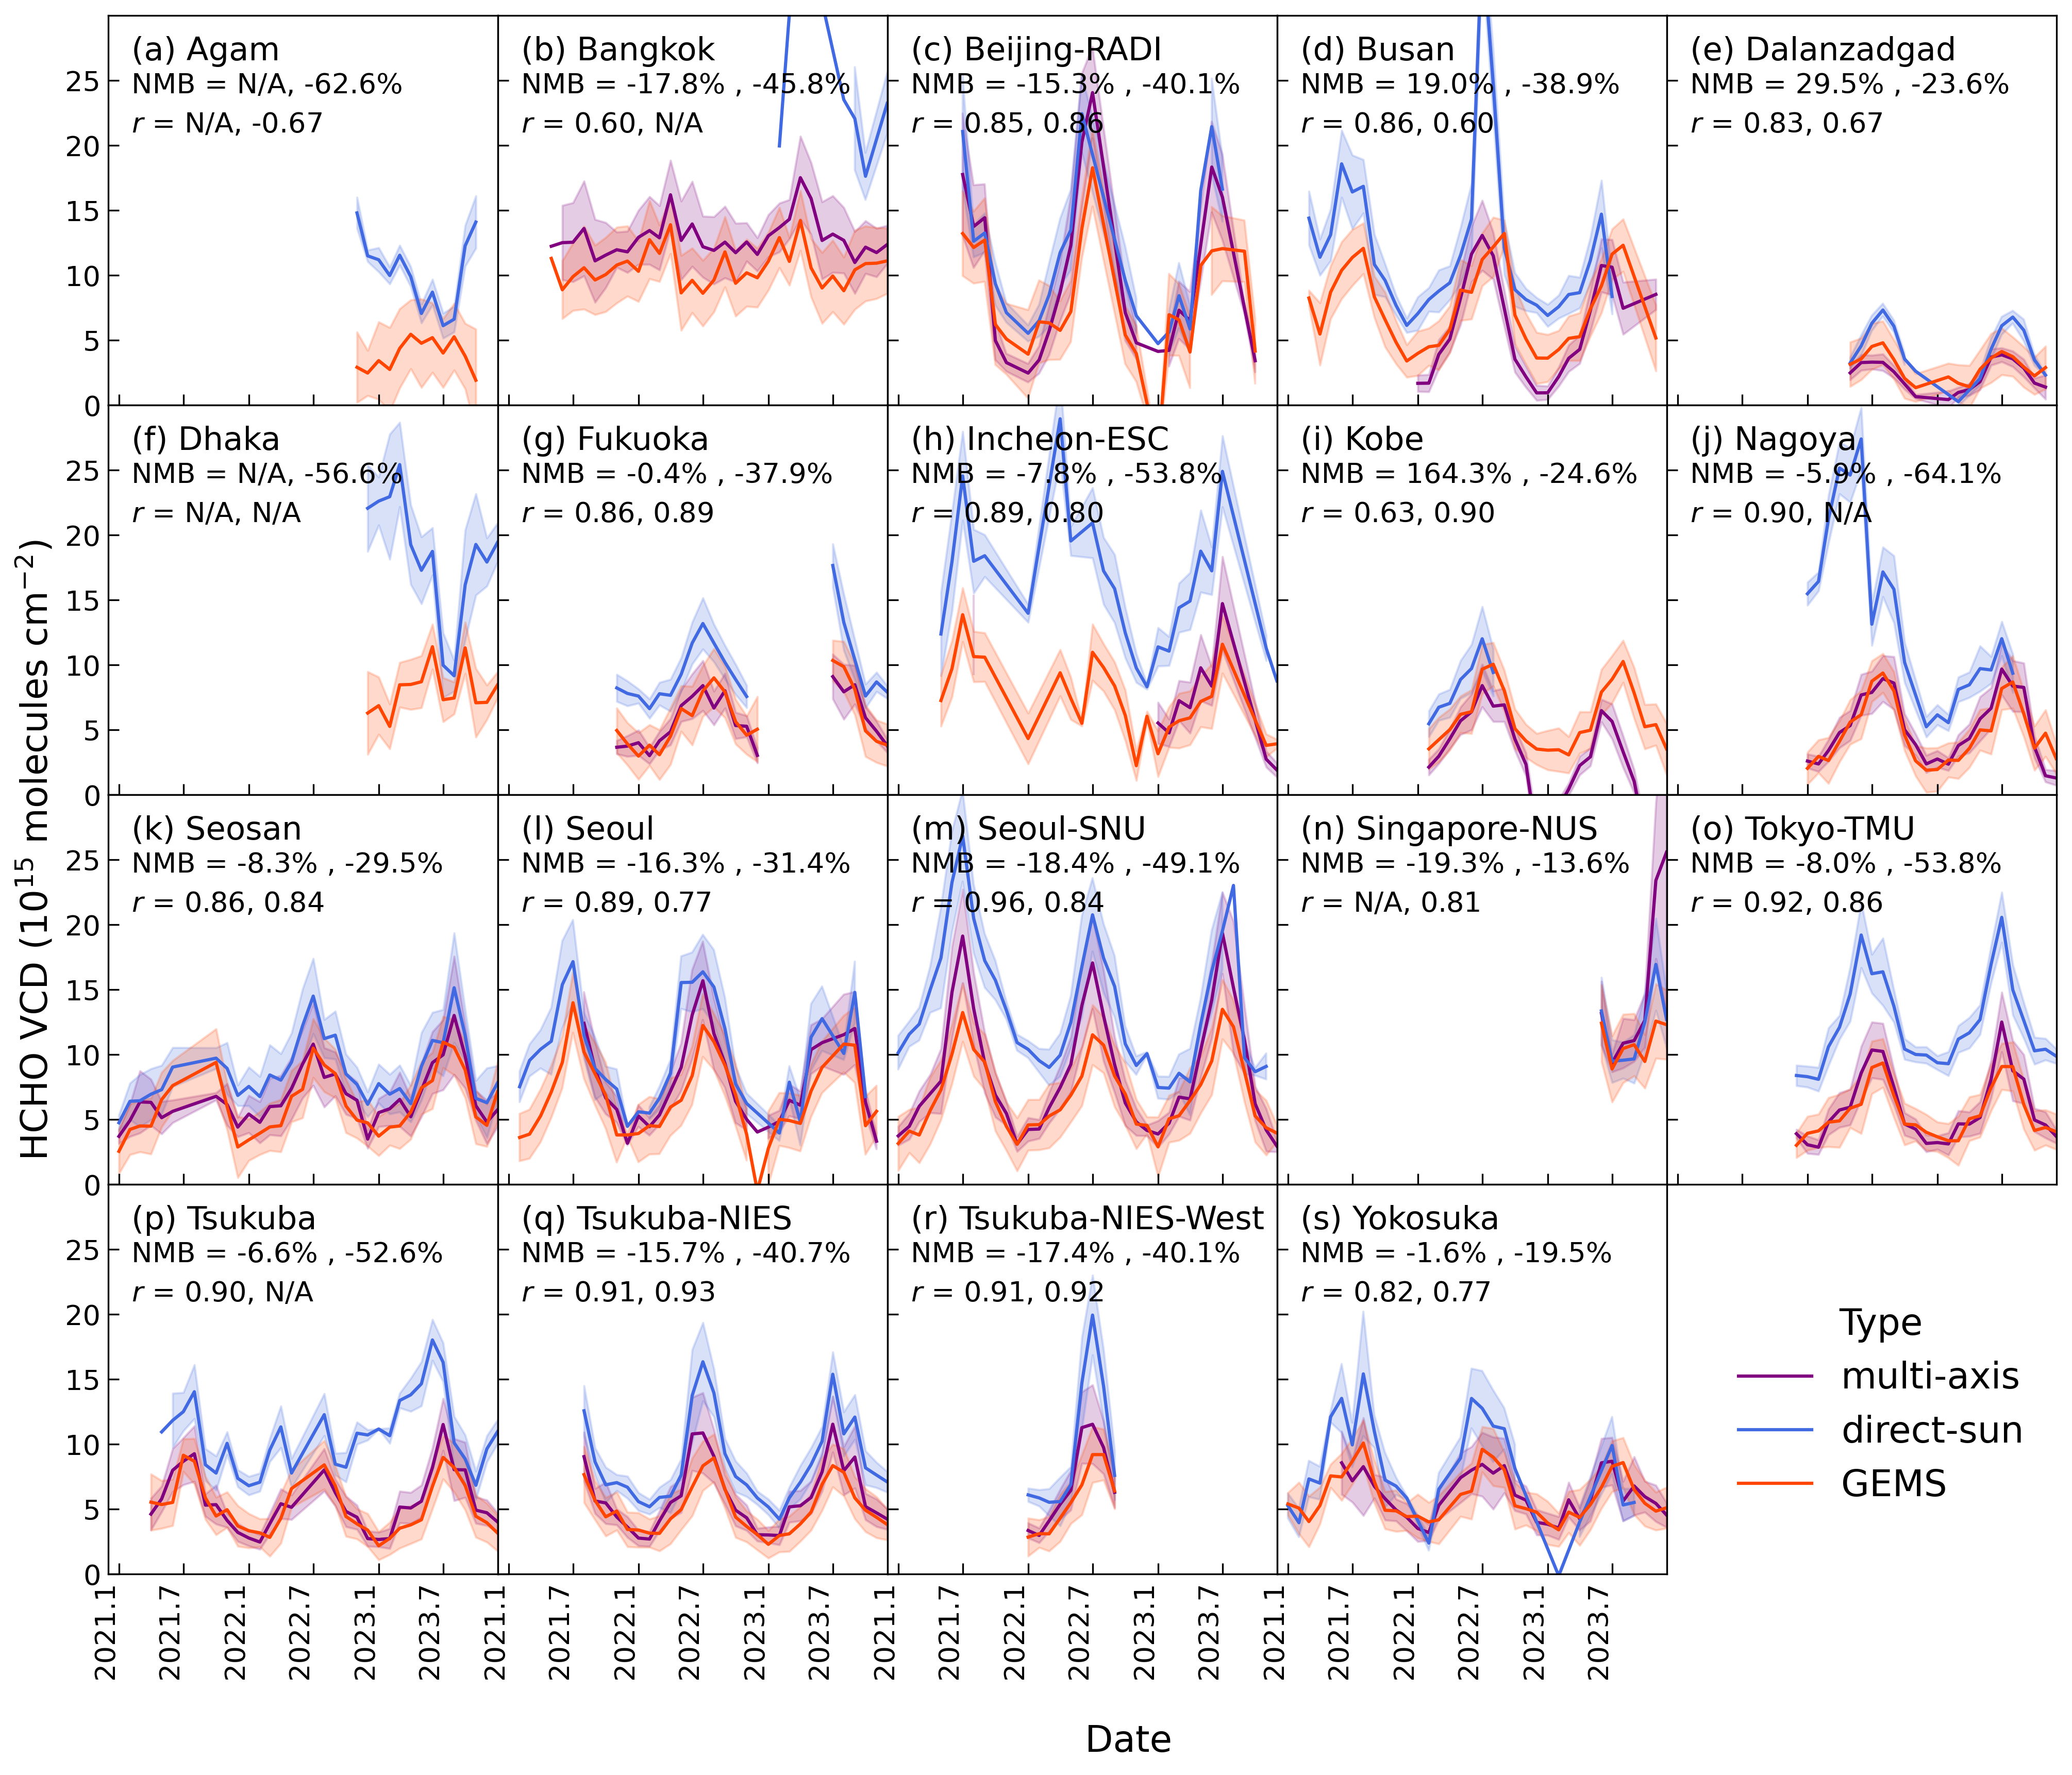

In [11]:
fig = plt.figure(figsize=(15, 12),dpi=300)
plt.subplots_adjust(wspace=0, hspace=0,top=0.95,left=0.06)
# fig = plt.figure(figsize=(16, 20))
sds = list(validata33['loca'].unique())
axs = [plt.subplot(round(len(sds)/5),5,i+1,) for i in range(len(sds))]
# axs[0].get_shared_x_axes().join(axs[0], *axs)
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
count = 0
lgd = True
# formatter = DateFormatter('%Y')
formatter = DateFormatter('%Y.%#m')
for a in axs:
#     try:
#     a.set_xticklabels([])
#     a.set_yticklabels([])
    a.set_ylim(0,30)
    a.set_xlim(datetime.datetime(2020,12,2),datetime.datetime(2023,12,2))
    if (count ==0):
        # dummy legend
        temp2 = validata33[(validata33['Location']=="Agam")].copy().head(1)
        temp2['Type'] = 'multi-axis'
        sns.lineplot(data=temp2[temp2['Type']=='multi-axis'], x='datetime',y='VCD',label='multi-axis',ax = a,legend=True,errorbar=('sd',0.5),markers=True, color='purple')
    if sds[count]=='Incheon-ESC':
        sns.lineplot(data=validata33[(validata33['Year']<2022)&(validata33['loca']==sds[count])&(validata33['Type']=='multi-axis')], x='datetime',y='VCD',label='multi-axis',ax = a,legend=lgd,errorbar=('sd',0.5),markers='x',  color='purple')
        sns.lineplot(data=validata33[(validata33['Year']>+2022)&(validata33['loca']==sds[count])&(validata33['Type']=='multi-axis')], x='datetime',y='VCD',label='multi-axis',ax = a,legend=lgd,errorbar=('sd',0.5),markers='x',  color='purple')
        sns.lineplot(data=validata33[(validata33['loca']==sds[count])&(validata33['Type']=='direct-sun')], x='datetime',y='VCD',label='direct-sun',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='royalblue')
#         sns.lineplot(data=validata33[validata33['loca']==sds[count]], x='datetime',y='vcd0',label='VCD0',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='yellow')
        sns.lineplot(data=validata33[validata33['loca']==sds[count]], x='datetime',y='GEMS',label='GEMS',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='orangered')
    elif sds[count]=='Fukuoka':
        sns.lineplot(data=validata33[(validata33['Year']<2023)&(validata33['loca']==sds[count])&(validata33['Type']=='multi-axis')], x='datetime',y='VCD',label='multi-axis',ax = a,legend=lgd,errorbar=('sd',0.5),markers='x',  color='purple')
        sns.lineplot(data=validata33[(validata33['Year']>=2023)&(validata33['loca']==sds[count])&(validata33['Type']=='multi-axis')], x='datetime',y='VCD',label='multi-axis',ax = a,legend=lgd,errorbar=('sd',0.5),markers='x',  color='purple')
        
        sns.lineplot(data=validata33[(validata33['Year']<2023)&(validata33['loca']==sds[count])&(validata33['Type']=='direct-sun')], x='datetime',y='VCD',label='direct-sun',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='royalblue')
        sns.lineplot(data=validata33[(validata33['Year']>=2023)&(validata33['loca']==sds[count])&(validata33['Type']=='direct-sun')], x='datetime',y='VCD',label='direct-sun',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='royalblue')
#         sns.lineplot(data=validata33[(validata33['Year']<2023)&(validata33['loca']==sds[count])], x='datetime',y='vcd0',label='VCD0',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='yellow')
#         sns.lineplot(data=validata33[(validata33['Year']>=2023)&(validata33['loca']==sds[count])], x='datetime',y='vcd0',label='VCD0',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='yellow')
        sns.lineplot(data=validata33[(validata33['Year']<2023)&(validata33['loca']==sds[count])], x='datetime',y='GEMS',label='GEMS',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='orangered')
        sns.lineplot(data=validata33[(validata33['Year']>=2023)&(validata33['loca']==sds[count])], x='datetime',y='GEMS',label='GEMS',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='orangered')
    else:
        sns.lineplot(data=validata33[(validata33['loca']==sds[count])&(validata33['Type']=='multi-axis')], x='datetime',y='VCD',label='multi-axis',ax = a,legend=lgd,errorbar=('sd',0.5),markers='x',  color='purple')
        sns.lineplot(data=validata33[(validata33['loca']==sds[count])&(validata33['Type']=='direct-sun')], x='datetime',y='VCD',label='direct-sun',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='royalblue')
#         sns.lineplot(data=validata33[validata33['loca']==sds[count]], x='datetime',y='vcd0',label='VCD0',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='yellow')
        sns.lineplot(data=validata33[validata33['loca']==sds[count]], x='datetime',y='GEMS',label='GEMS',ax = a,legend=lgd,errorbar=('sd',0.5),markers=True, color='orangered')
    
        
    if (count ==0):
        
#         temp2 = validata33[(validata33['Location']=="Agam")].copy().head(1)
#         temp2['Type'] = 'multi-axis'
#         sns.lineplot(data=temp2[temp2['Type']=='multi-axis'], x='datetime',y='VCD',label='multi-axis',ax = a,legend=True,errorbar=('sd',0.5),markers=True, color='purple')
        fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.13), title='Type', frameon=False,title_fontsize =17,markerscale=3,fontsize =17
                  ) #
        a.get_legend().remove()
    lgd = False

    
    a.text(0.06,0.885,'('+alp[count]+') '+sds[count],transform=axs[count].transAxes,size=15)
#         a.set_title(sds[count], pad = 0, fontsize=10)
    a.set_xlabel('', labelpad = 0.1,color='white')
    a.set_ylabel('', labelpad = 0.1,color='white')


#     a.xaxis.set_major_locator(FixedLocator([datetime.datetime(2021,1,1),datetime.datetime(2021,7,1),datetime.datetime(2022,1,1),
#                                            datetime.datetime(2022,7,1),datetime.datetime(2023,1,1),datetime.datetime(2023,7,1)]))
    a.xaxis.set_major_locator(MonthLocator(bymonth=[1,7]))
    
#         a.xaxis.set_major_locator(MonthLocator(interval=6))
    try:
        if (float(monthlyMDR.loc[sds[count]]['p'])<0.05):
            md_r = "{:.2f}".format(monthlyMDR.loc[sds[count]]['R'])
        else:
            md_r = 'N/A'
    except:
        md_r = 'N/A'
    try:
        if (float(monthlyDSR.loc[sds[count]]['p'])<0.05):
            ds_r = "{:.2f}".format(monthlyDSR.loc[sds[count]]['R'])
        else:
            ds_r = 'N/A'
    except:
        ds_r = 'N/A'    
    a.text(0.06,0.7,'$\it{r}$ = '+md_r +', '+ds_r,transform=axs[count].transAxes,size=13)    
#     try:
#         if (float(monthlyMDR.loc[sds[count]]['p'])<0.05):
#             a.text(0.06,0.7,'$\it{r}$ = '+"{:.2f}".format(monthlyMDR.loc[sds[count]]['R']),transform=axs[count].transAxes,size=13)
#     except:
#         pass
    try:
        a.text(0.06,0.8,'NMB = '+"{:.1f}".format(monthlyMDR.loc[sds[count]]['bias']*100)+'% , {:.1f}%'.format(monthlyDSR.loc[sds[count]]['bias']*100),transform=axs[count].transAxes,size=13)
    except:
        a.text(0.06,0.8,'NMB = N/A, {:.1f}%'.format(monthlyDSR.loc[sds[count]]['bias']*100),transform=axs[count].transAxes,size=13)
        

#         a.xticks(rotation=90)
#         a.yticks(fontsize=20)
    a.tick_params(direction = 'in',size=5, labelsize=13) 
#         a.tick_params(axis='x',rotation=45) 
    if (count%5!=0):
        a.tick_params(axis='y',labelleft=False) 
        a.xaxis.set_major_formatter(formatter)
#         a.set_xticks(rotation=90)
#         a.set_xticklabels(ticks)
#         a.set_xticks(ticks= [datetime.datetime(2020,12,2),datetime.datetime(2023,12,2)],rotation=45, ha='right') 
    if (count<15):
        a.tick_params(axis='x',label1On=False)
    else:
        a.set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023.1','2023.7'], rotation=90, ha='right')

#         plt.xticks(rotation=90)
    a.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
#     aa = plt.gca()
#     aa.set_xticks(rotation=90)
#         
        
        
#             a.set_xticklabels(fontsize=40)

#             plt.xticks(fontsize=20)
#         )
        
#     except:
#         print('?')
    count = count+1

# axs[14].set_xticklabels(['2021.1','2021.7','2022.1','2022.7','2023.1','2023.7'], rotation=90, ha='right')
#         density=scatter_density(temp['VCD'].array, temp['GEMS'].array, cmap=white_viridis)
# cax = fig.add_axes([0.9, 0.06, 0.02, 0.15]) # Left Bottom Width Height
# clb = fig.colorbar(axs[0].get_children()[0], cax=cax,label='',orientation='vertical')
# clb.ax.set_title('Count')        

fig.supxlabel('Date',size=17)
fig.supylabel('HCHO VCD (10$^{15}$ molecules cm$^{-2}$)',size=17)
# plt.suptitle('Monthly Variations of HCHO VCD from GEMS and Pandora Observations', size =17, weight = 'bold')